# Breast Cancer Classification By Machine Learning And Data Science
## Created And Done By "Anubhav Kumar Gupta"

#### In this analysis and prediction i try to analyze breast cancer dataset and try to build a model that predict by creating parameters of data points lead to predict cancer.
#### I have used classification supervised machine learning model.

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [180]:
cancer=pd.read_csv('Cancer.csv')

In [181]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [182]:
cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [183]:
cancer.shape

(569, 33)

In [184]:
cancer.size

18777

In [185]:
cancer.columns=cancer.columns.str.strip()

In [186]:
cancer.columns=cancer.columns.str.lower()

In [187]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'unnamed: 32'],
      dtype='object')

In [188]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
unnamed:

In [189]:
cancer[cancer.duplicated(subset=['id'],keep=False)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,unnamed: 32


In [190]:
cancer.drop(['unnamed: 32','id'],axis=1,inplace=True)

In [191]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [192]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

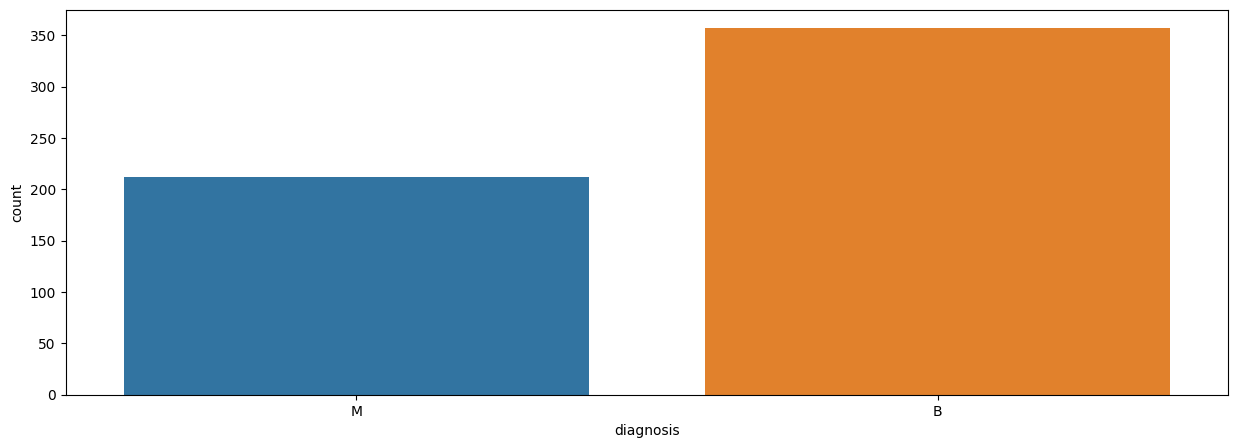

In [193]:
plt.figure(figsize=(15,5))
sns.countplot(data=cancer,x='diagnosis')

In [194]:
cancer['diagnosis']=cancer['diagnosis'].replace({'M':0,'B':1})

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

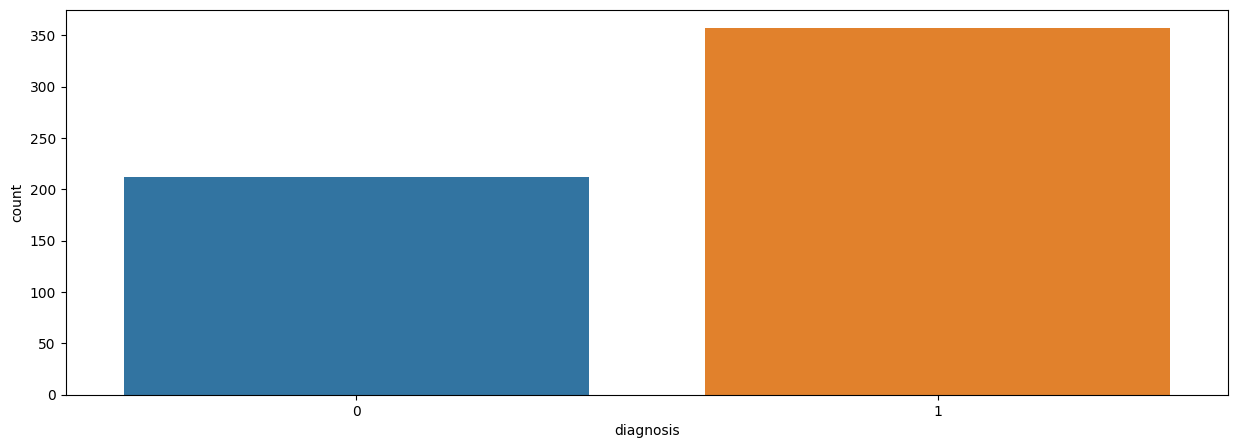

In [195]:
plt.figure(figsize=(15,5))
sns.countplot(data=cancer,x='diagnosis')

In [196]:
cancer['diagnosis'].value_counts().to_frame()

,diagnosis
1,357
0,212


In [197]:
from sklearn.utils import resample

In [198]:
cancer_majority=cancer[cancer['diagnosis']==1]
cancer_minority=cancer[cancer['diagnosis']==0]

In [199]:
cancer_majority_downsample=resample(cancer_majority,n_samples=212,replace=False,random_state=42)

In [200]:
cancer_df=pd.concat([cancer_majority_downsample,cancer_minority])

In [201]:
cancer_df['diagnosis'].value_counts().to_frame()

,diagnosis
1,212
0,212


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

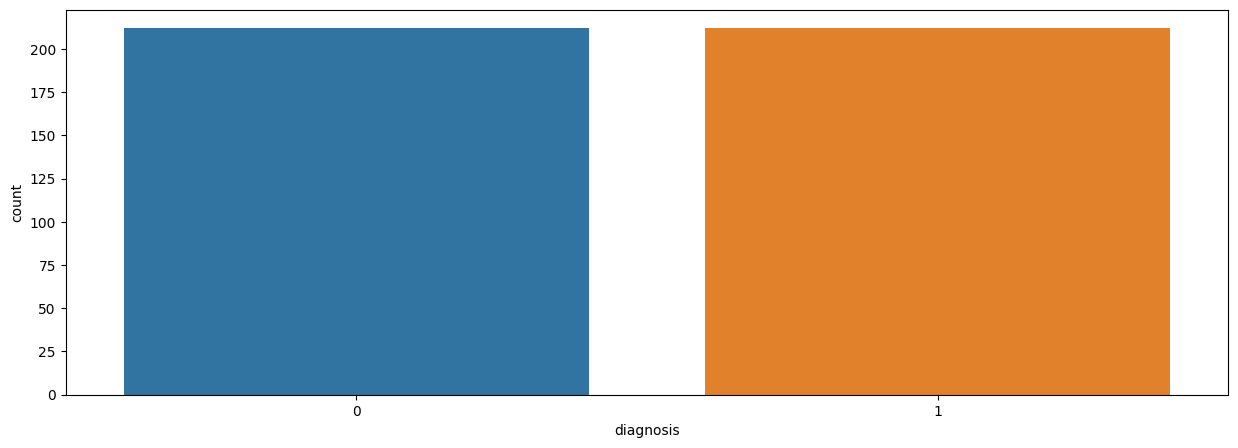

In [202]:
plt.figure(figsize=(15,5))
sns.countplot(data=cancer_df,x='diagnosis')

In [203]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [204]:
cancer_df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.713202,-0.383583,-0.726070,-0.678509,-0.393422,-0.599911,-0.679539,-0.762324,-0.326847,...,-0.755354,-0.435778,-0.763152,-0.699592,-0.448737,-0.576074,-0.650440,-0.791105,-0.412899,-0.308203
radius_mean,-0.713202,1.000000,0.310160,0.997721,0.988081,0.189601,0.504577,0.672740,0.824131,0.141487,...,0.966183,0.276109,0.961799,0.939116,0.127465,0.374167,0.497335,0.726803,0.139735,-0.031473
texture_mean,-0.383583,0.310160,1.000000,0.314764,0.301619,-0.029535,0.213825,0.265356,0.262807,0.065073,...,0.334459,0.902844,0.340338,0.321342,0.072451,0.250187,0.267407,0.259175,0.094849,0.092624
perimeter_mean,-0.726070,0.997721,0.314764,1.000000,0.986686,0.229615,0.556884,0.713213,0.853377,0.181057,...,0.965746,0.281498,0.967160,0.938751,0.160293,0.418037,0.535975,0.755148,0.167350,0.013158
area_mean,-0.678509,0.988081,0.301619,0.986686,1.000000,0.190829,0.490655,0.676824,0.819397,0.139194,...,0.957959,0.259772,0.954254,0.954689,0.122273,0.346974,0.479498,0.700776,0.111837,-0.038604
smoothness_mean,-0.393422,0.189601,-0.029535,0.229615,0.190829,1.000000,0.695635,0.586398,0.591939,0.545782,...,0.234967,0.052082,0.265612,0.220452,0.816281,0.523978,0.509120,0.561167,0.412652,0.543451
compactness_mean,-0.599911,0.504577,0.213825,0.556884,0.490655,0.695635,1.000000,0.886641,0.833724,0.640477,...,0.532788,0.237511,0.591140,0.500258,0.592604,0.866781,0.825185,0.825852,0.540898,0.672895
concavity_mean,-0.679539,0.672740,0.265356,0.713213,0.676824,0.586398,0.886641,1.000000,0.923391,0.542191,...,0.678231,0.267431,0.721656,0.660933,0.483573,0.733283,0.876239,0.856732,0.424742,0.489474
concave points_mean,-0.762324,0.824131,0.262807,0.853377,0.819397,0.591939,0.833724,0.923391,1.000000,0.480603,...,0.827366,0.265378,0.854729,0.801019,0.469259,0.643401,0.742335,0.905229,0.378125,0.338337
symmetry_mean,-0.326847,0.141487,0.065073,0.181057,0.139194,0.545782,0.640477,0.542191,0.480603,1.000000,...,0.179347,0.093152,0.220001,0.163807,0.421848,0.515747,0.481638,0.465382,0.711040,0.471245


<AxesSubplot: >

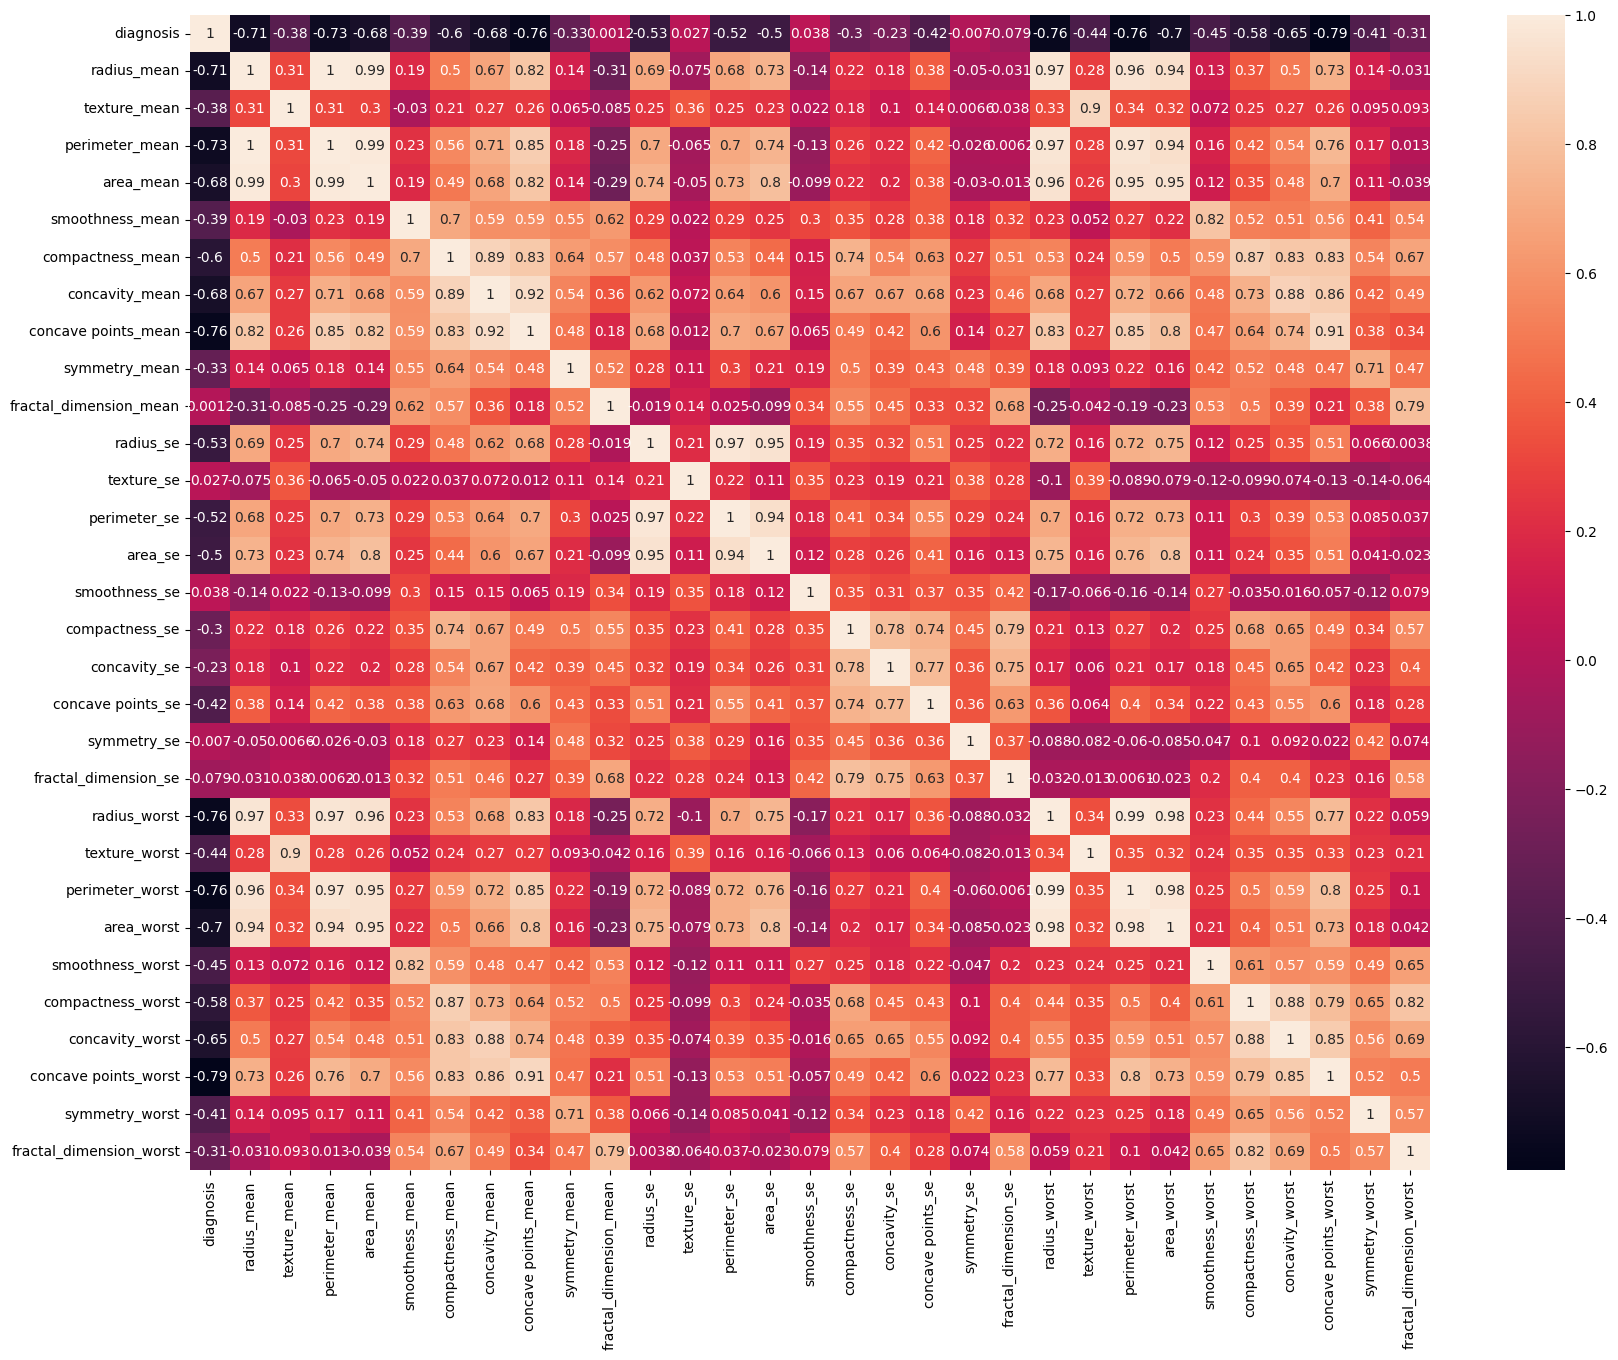

In [205]:
plt.figure(figsize=(20,15))
sns.heatmap(cancer_df.corr(),annot=True)

In [206]:
df_corr_diag=cancer_df.corr()['diagnosis'].to_frame()

<AxesSubplot: xlabel='diagnosis'>

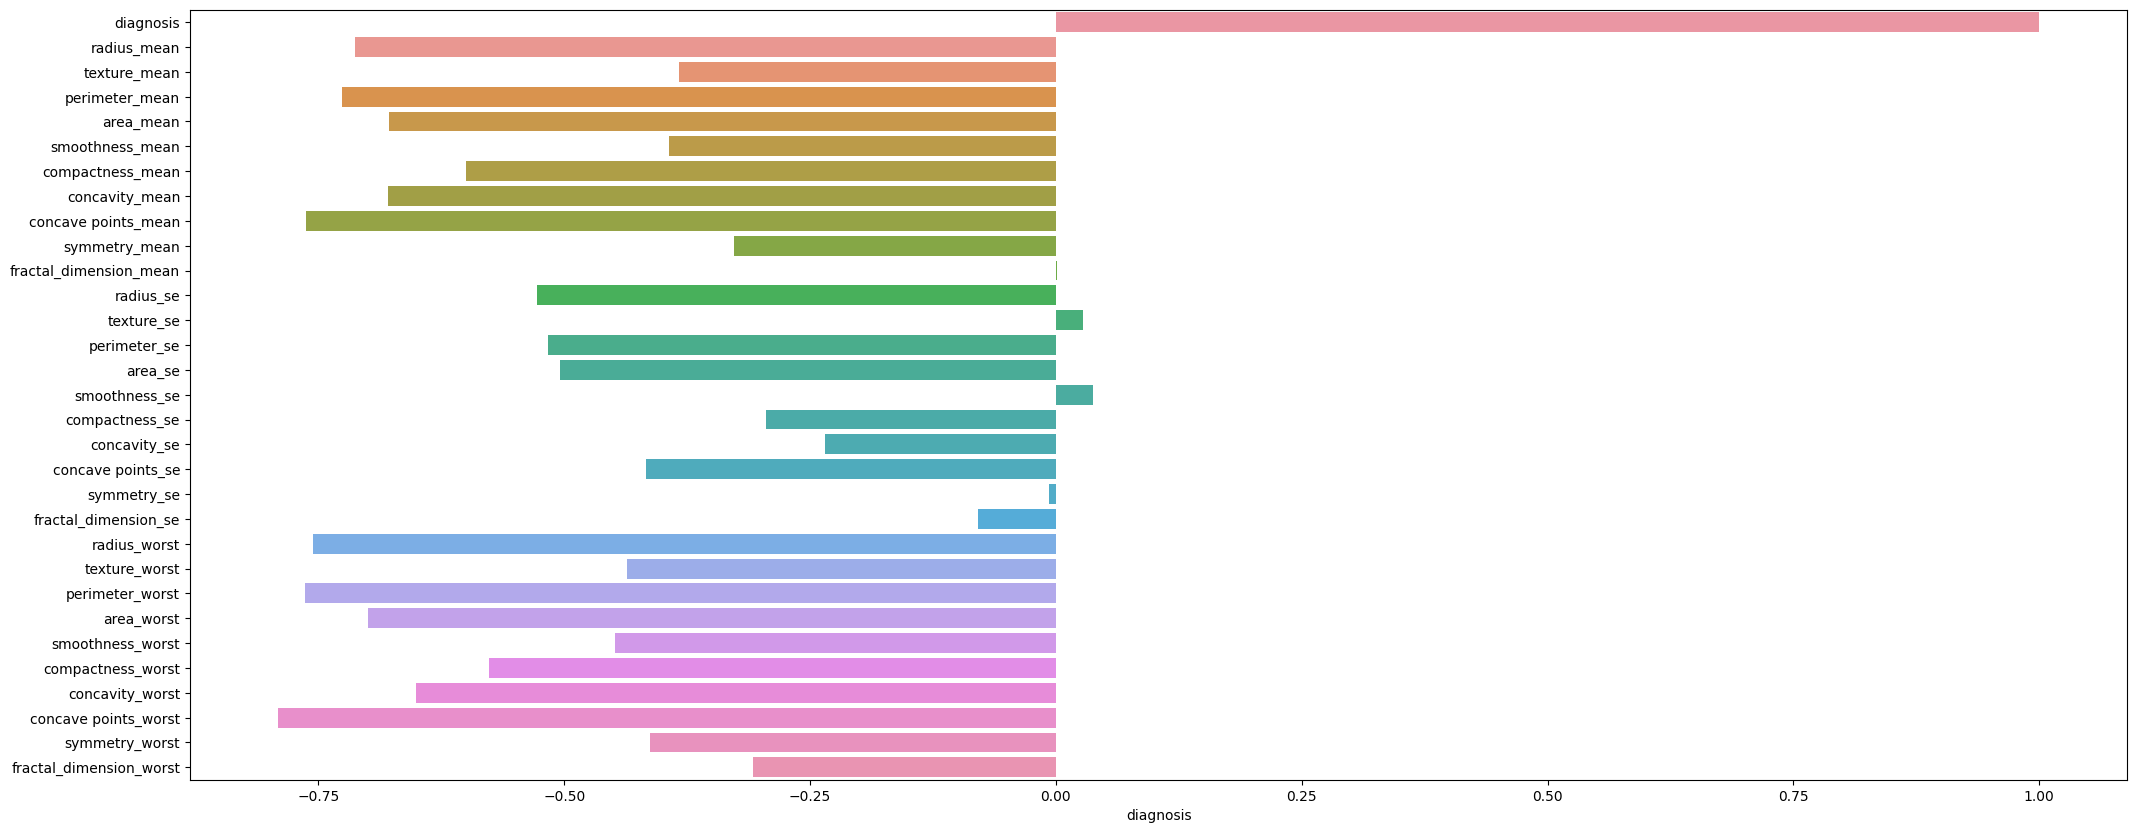

In [207]:
plt.figure(figsize=(25,10))
sns.barplot(data=df_corr_diag,y=df_corr_diag.index,x='diagnosis')

In [208]:
x=cancer_df.drop(['diagnosis'],axis=1)
y=cancer_df['diagnosis']

## Train Test Split

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [211]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((296, 30), (128, 30), (296,), (128,))

## Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
lr=LogisticRegression(max_iter=3000)

In [214]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=3000)

In [215]:
lr.score(x_train,y_train)

0.956081081081081

In [216]:
lr.score(x_test,y_test)

0.9375

In [217]:
y_pred=lr.predict(x_test)

In [218]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [219]:
precision_score(y_test,y_pred)

0.9696969696969697

In [220]:
recall_score(y_test,y_pred)

0.9142857142857143

In [221]:
accuracy_score(y_test,y_pred)

0.9375

In [222]:
f1_score(y_test,y_pred)

0.9411764705882354

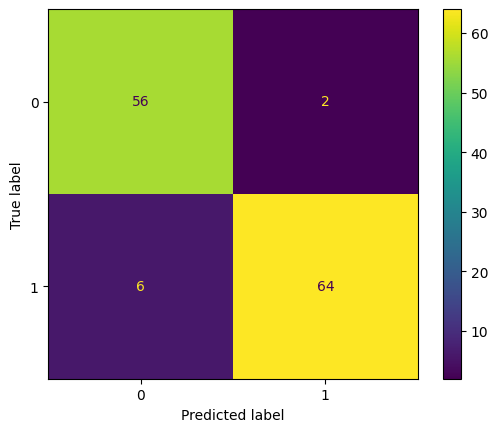

In [223]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

## Logistic Regression With CV Lasso And Ridge

In [224]:
from sklearn.linear_model import LogisticRegressionCV

In [225]:
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l1',cv=3,Cs=10)

In [226]:
lr.fit(x_train,y_train)

LogisticRegressionCV(cv=3, max_iter=500, penalty='l1', solver='liblinear')

In [227]:
lr.score(x_train,y_train)

0.9797297297297297

In [228]:
lr.score(x_test,y_test)

0.9609375

In [229]:
y_pred=lr.predict(x_test)

In [230]:
precision_score(y_test,y_pred)

0.9710144927536232

In [231]:
recall_score(y_test,y_pred)

0.9571428571428572

In [232]:
accuracy_score(y_test,y_pred)

0.9609375

In [233]:
f1_score(y_test,y_pred)

0.9640287769784173

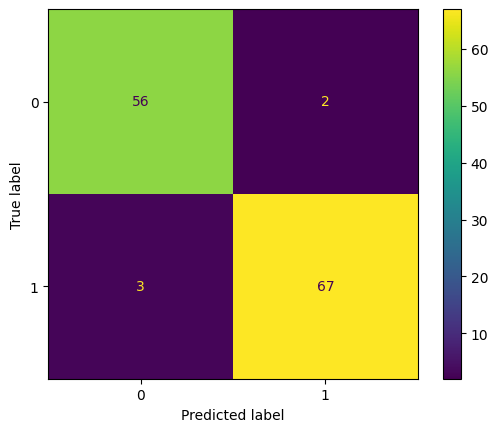

In [234]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [235]:
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l2',cv=3,Cs=10)

In [236]:
lr.fit(x_train,y_train)

LogisticRegressionCV(cv=3, max_iter=500, solver='liblinear')

In [237]:
lr.score(x_train,y_train)

0.972972972972973

In [238]:
lr.score(x_test,y_test)

0.9375

In [239]:
y_pred=lr.predict(x_test)

In [240]:
precision_score(y_test,y_pred)

0.9428571428571428

In [241]:
recall_score(y_test,y_pred)

0.9428571428571428

In [242]:
accuracy_score(y_test,y_pred)

0.9375

In [243]:
f1_score(y_test,y_pred)

0.9428571428571428

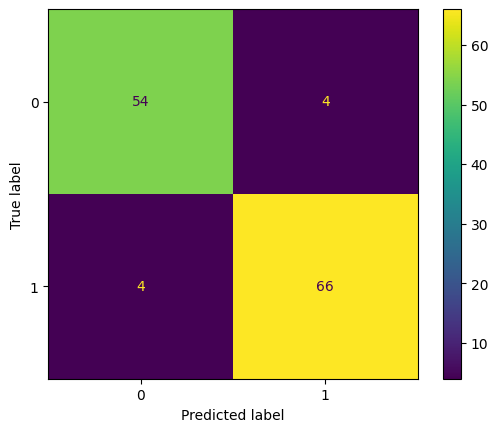

In [244]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

#### Outcome Of Prediction:-
#### Logistic Regression and Logistic Regression CV with Ridge Regression is not good to implement on this dataset because it's providing good accuracy on train and test dataset but not reducing overfitting very much.
#### Logistic Regression CV with Lasso Regression is good to implement on this dataset because it's providing good accuracy on train and test dataset by reducing overfitting.

### Thanks And Regards
## Anubhav Kumar Gupta